# <center>UV4.2 - Advanced Signal Processing </center>
## <center> Lab 4: DOA estimation Part II </center>
### <center> A. Drémeau \& C. Vanwynsberghe - 2021/2022 </center>
### <center> Student name 1 - Student name 2</center>

The goals of this lab are the following:
- reproducing some basic properties of a sensor array (directivity pattern & resolution) 
- implementing & analyzing the most standard Direction of Arrival (*ie* DOA) methods
- implementing & analyzing more advanced DOA methods


## Problem statement

We consider a DOA problem, in which we try to localize sources from the far field by a Uniform Linear Array (ULA). We set the problem in the frequency domain, at the specific wavelength $\lambda$ (or the frequency $f$ if the wave celerity is known). Here are the following hypotheses:
* the $S$ sources are uncorrelated, and do not move (stationary spatial hypothesis). The $s$-th source has an amplitude $x_s$, and is positioned at angle $\theta_s$.
* the ULA consists of M sensors, regularly spaced by a distance $d$. At one given time indexed by $l$, it measures one realization (called *snapshot*), that is, the vector $\mathbf{y}_l \in \mathbb{C}^{M \times 1}$. The sensors also contains an additive uncorrelated noise with a standard deviation $\sigma = 0.5$. Therefore $\mathbf{n}_l \sim \mathcal{N}_{\mathbb{C}} (\mathbf{0}, \sigma^2 \mathbf{I}_M)$ .

Since the sources are into the far field, the ULA measures the snapshots

$$ \mathbf{y}_l = \sum_{s=1}^{S} x_s \mathbf{a}(\theta_s) + \mathbf{n}_l $$

where $\mathbf{a}(\theta_s) \in \mathbb{C}^{M \times 1}$ is the *steering vector* modeling the plane wave propagation. With this ULA configuration, it writes:
$$ \mathbf{a}(\theta_s) =
\begin{bmatrix}
    1\\
    \exp(-\jmath  \dfrac{2 \pi d}{\lambda} 1 \sin(\theta_s)) \\
    \exp(-\jmath  \dfrac{2 \pi d}{\lambda} 2 \sin(\theta_s)) \\
\vdots \\
    \exp(-\jmath  \dfrac{2 \pi d}{\lambda} m \sin(\theta_s)) \\
    \vdots \\
    \exp(-\jmath  \dfrac{2 \pi d}{\lambda} (M-1) \sin(\theta_s)) \\
\end{bmatrix}$$

In DOA, we want to estimate the unknown angles $\theta_s$ and amplitudes $x_s$. To do so, we search the sources on a regular grid of $N$ angles $\theta_1, \dots, \theta_n, \dots, \theta_N \in [-\dfrac{\pi}{2}, \dfrac{\pi}{2}]$. Thus we search the vector of sources from these angles: $\mathbf{x} \in \mathbb{C}^{N \times 1}$. The forward model finally writes:

$$\mathbf{y}_l = \mathbf{Ax + n}_l$$

with $\mathbf{A} \in \mathbb{C}^{M \times N}$ the matrix of steering vectors, such that $\mathbf{A} = [\mathbf{a}(\theta_1), \dots, \mathbf{a}(\theta_n), \dots, \mathbf{a}(\theta_N)]$.

## Part I - Properties of the ULA

**For all the lab**, we have:
* M = 64 sensors
* an angle resolution of $\dfrac{1}{4}$°, *ie* we sample $[-\dfrac{\pi}{2}, \dfrac{\pi}{2}]$ on $N = 4\times180 + 1 = 721$ points.


<div class="alert alert-info">
<h3 class="alert-heading"> Question 1</h3>

Write a code to plot the directivity patterns of the ULA, in dB, for:
* $\theta_0 = 0$ and $\theta_0 = -\dfrac{\pi}{4}$,
* for $d_{norm} = \frac{d}{\lambda}=\dfrac{1}{2}$ (Nyquist limit), $d_{norm} =  \frac{d}{\lambda}= \dfrac{1}{8}$ (oversampled) & $d_{norm} =  \frac{d}{\lambda}=  \dfrac{1}{1.2}$ (undersampled),

We recall that it corresponds to the Beamforming of a source of amplitude $1$ at angle $\theta$ : $DP(\theta) = 20 \log_{10} \left( \dfrac{|\mathbf{a}(\theta)^H \mathbf{a}(\theta_0)|}{\|\mathbf{a}(\theta)\|^2} \right)$ dB.
</div>

<IPython.core.display.Javascript object>


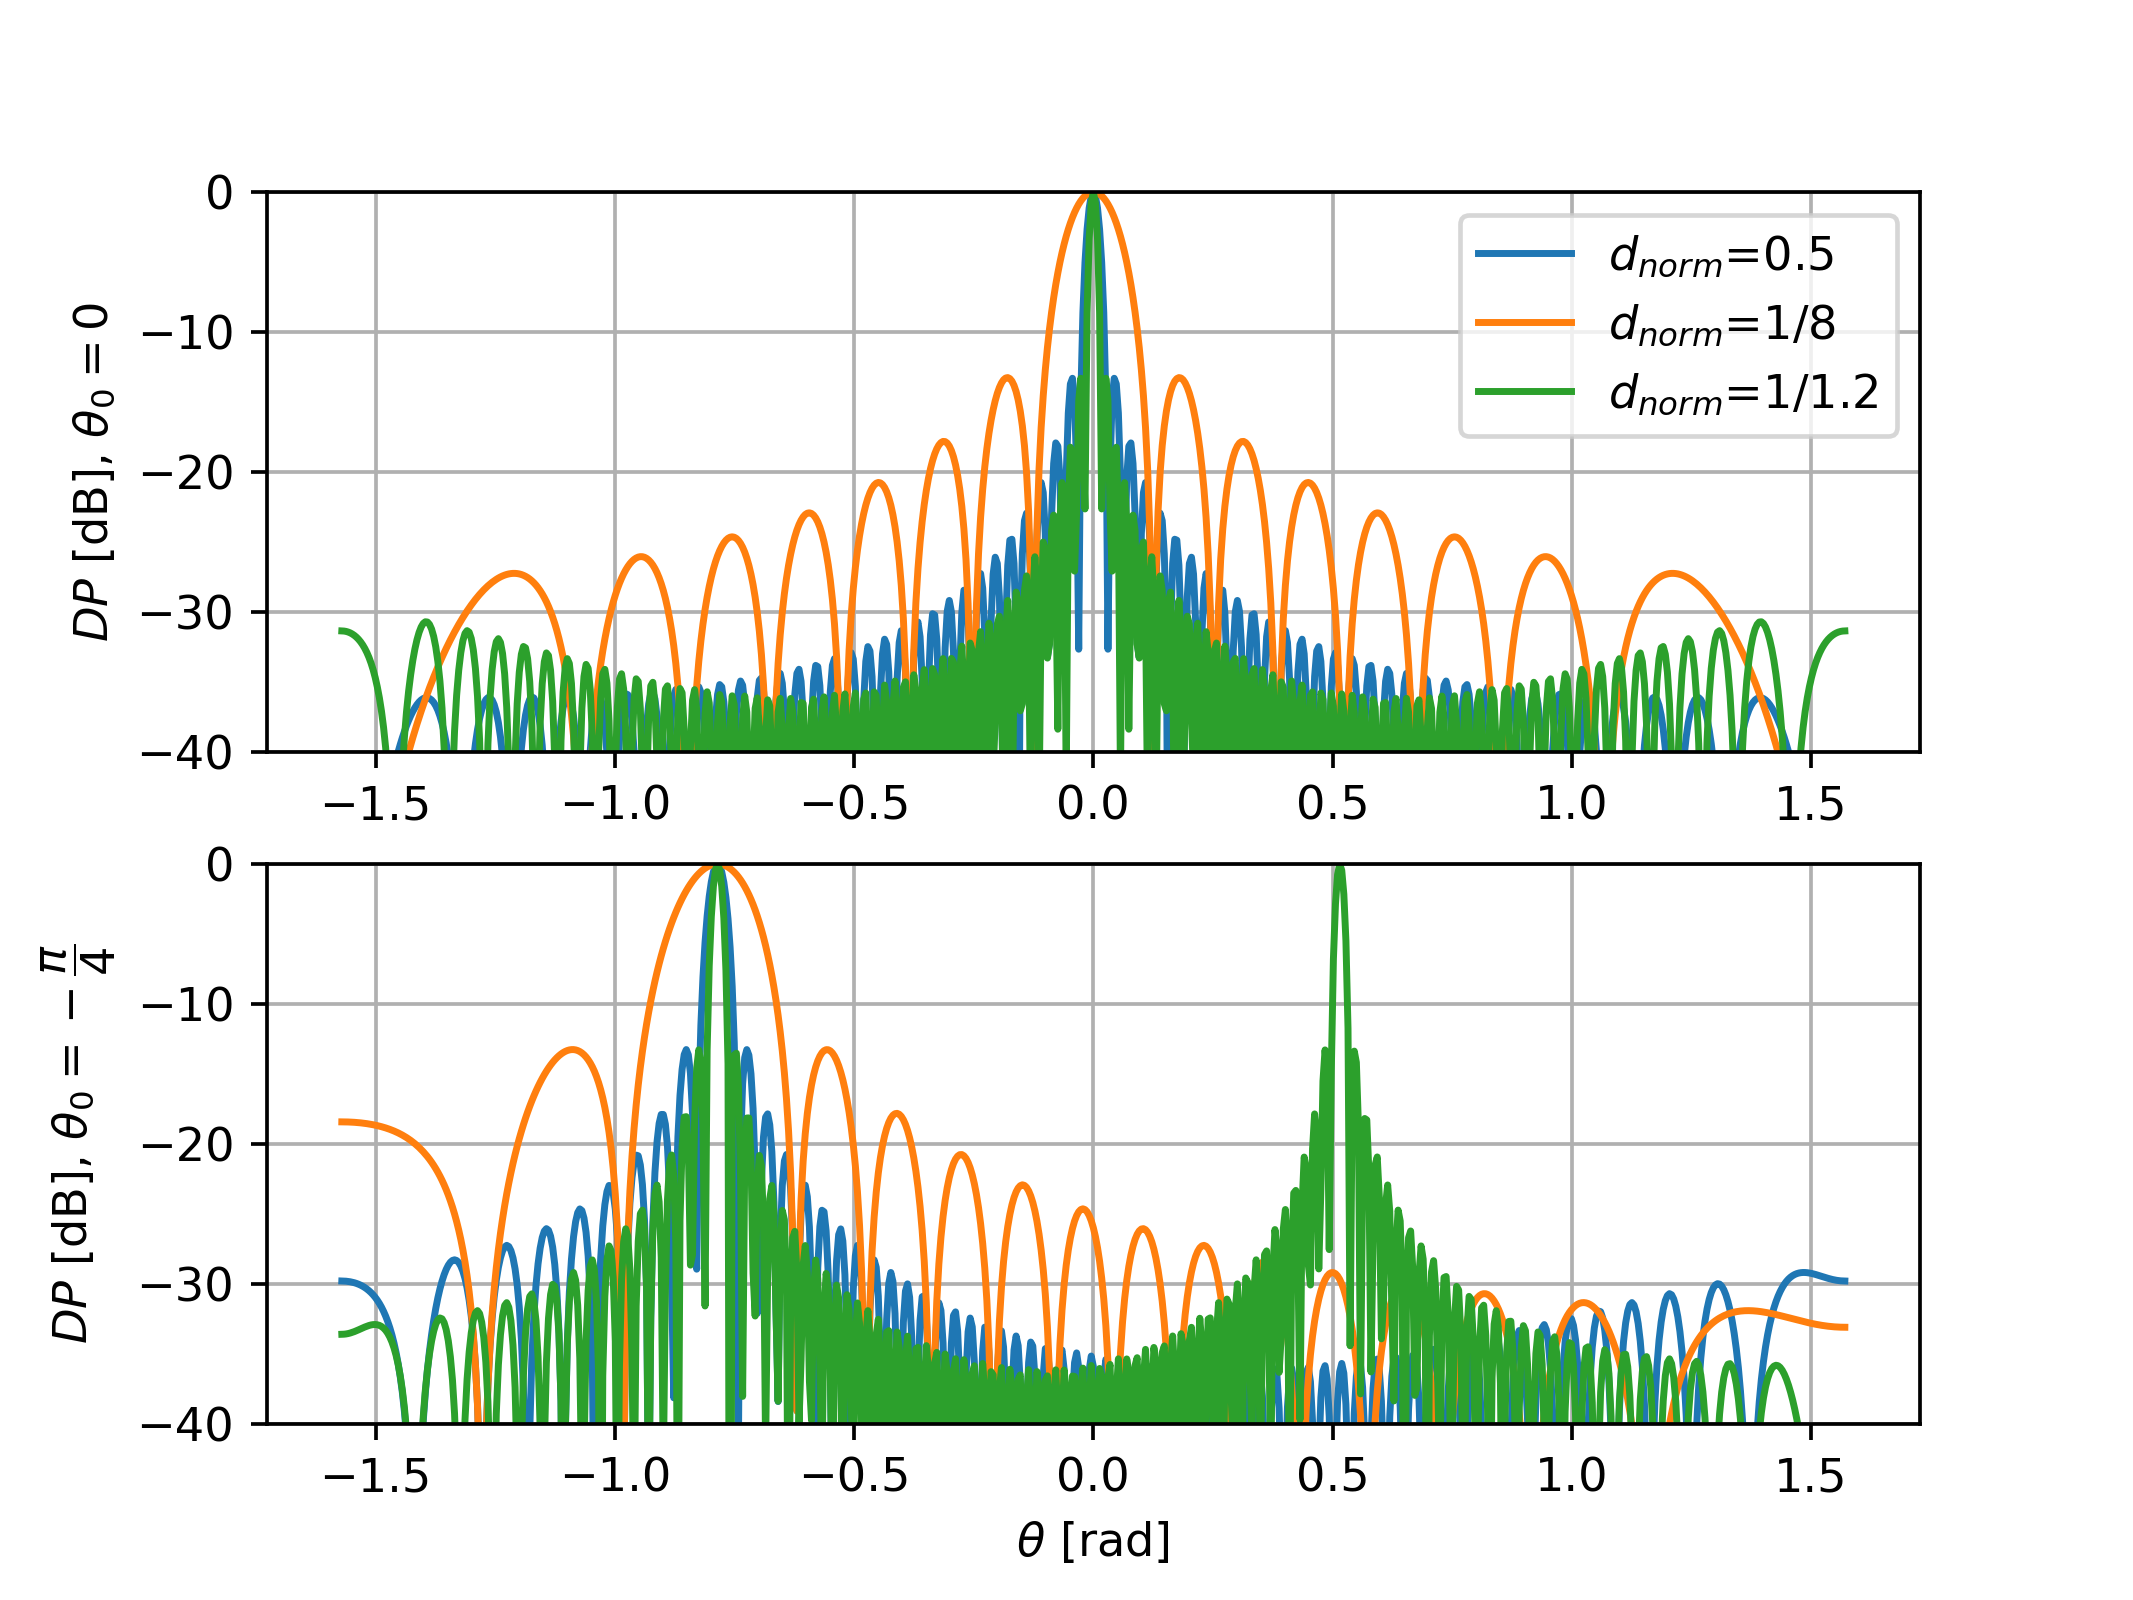

Text(0, 0.5, '$DP$ [dB], $\\theta_0 = -\\dfrac{\\pi}{4}$')

In [1]:
# for interactive matplotlib figures, use the command %matplotlib notebook
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

M = 64
N = 180*4 + 1

thetas = np.linspace(-np.pi/2, np.pi/2, N)
pos_sensors = np.arange(M)[:, None]

d_norm = 0.5
A_nyquist = np.exp(-2*1j*np.pi*d_norm * pos_sensors * np.sin(thetas))
d_norm = 1/8
A_oversampled = np.exp(-2*1j*np.pi*d_norm * pos_sensors * np.sin(thetas))
d_norm = 1/1.2
A_subsampled = np.exp(-2*1j*np.pi*d_norm * pos_sensors * np.sin(thetas))

# Directivity pattern at 0°
DP_0_nyquist = A_nyquist.T.conj() @ A_nyquist[:, N//2] / M
DP_0_oversampled = A_oversampled.T.conj() @ A_oversampled[:, N//2] / M
DP_0_subsampled = A_subsampled.T.conj() @ A_subsampled[:, N//2] / M
# Directivity pattern at -45°
DP_45_nyquist = A_nyquist.T.conj() @ A_nyquist[:, N//4] / M
DP_45_oversampled = A_oversampled.T.conj() @ A_oversampled[:, N//4] / M
DP_45_subsampled = A_subsampled.T.conj() @ A_subsampled[:, N//4] / M

plt.figure()
plt.subplot(211)
plt.plot(thetas, 20*np.log10(np.abs(DP_0_nyquist)), label=r"$d_{norm}$=0.5")
plt.plot(thetas, 20*np.log10(np.abs(DP_0_oversampled)), label=r"$d_{norm}$=1/8")
plt.plot(thetas, 20*np.log10(np.abs(DP_0_subsampled)), label=r"$d_{norm}$=1/1.2")
plt.legend()
plt.ylim(-40, 0)
plt.grid()
plt.ylabel(r"$DP$ [dB], $\theta_0 = 0$")
plt.subplot(212)
plt.plot(thetas, 20*np.log10(np.abs(DP_45_nyquist)))
plt.plot(thetas, 20*np.log10(np.abs(DP_45_oversampled)))
plt.plot(thetas, 20*np.log10(np.abs(DP_45_subsampled)))
plt.ylim(-40, 0)
plt.grid()
plt.xlabel(r"$\theta$ [rad]")
plt.ylabel(r"$DP$ [dB], $\theta_0 = -\dfrac{\pi}{4}$")

<div class="alert alert-info">
<h3 class="alert-heading"> Question 2</h3>

In the 6 cases (all $\theta_0$ and $\lambda$), compute the angle resolution $\theta_{-3 \text{dB}}$ in rad.
</div>

In [2]:
DPs = [DP_0_nyquist, DP_0_oversampled, DP_0_subsampled, DP_45_nyquist, DP_45_oversampled, DP_45_subsampled]
DPdBs = [20*np.log10(np.abs(Dp_)) for Dp_ in DPs]

DPdBs[-1][N//2:] = -100 # Discard the grating lobe to compute the resolution

resolutions = np.array([thetas[DP_>=-3].max() - thetas[DP_>=-3].min() for DP_ in DPdBs])
resolutions *= 180./np.pi  # in °

print("""resolution angles (-3dB) are:
- for 0°,   d_norm=0.5,   {}°
- for 0°,   d_norm=1/8,   {}°
- for 0°,   d_norm=1/1.2, {}°
- for -45°, d_norm=0.5,   {}°
- for -45°, d_norm=1/8,   {}°
- for -45°, d_norm=1/1.2, {}°
          """.format(*resolutions.round(5)))

resolution angles (-3dB) are:
- for 0°,   d_norm=0.5,   1.5°
- for 0°,   d_norm=1/8,   6.0°
- for 0°,   d_norm=1/1.2, 0.5°
- for -45°, d_norm=0.5,   2.0°
- for -45°, d_norm=1/8,   8.75°
- for -45°, d_norm=1/1.2, 1.0°
          


(Your written answer cell, if necessary...)

<div class="alert alert-info">
<h3 class="alert-heading"> Question 3</h3>

In which case do we obtain a grating lobe? And why?
</div>

Grating lobe if Nyquist sampling not respected, when $d > \dfrac{\lambda}{2}$

## Part II - DOA estimation

With the same ULA ($M=64$), we want to localize $S = 3$  sources from the far field at angles $\theta_s = -\dfrac{\pi}{9}$, $-\dfrac{\pi}{15}$, $\dfrac{\pi}{3}$, with amplitudes (*resp*) $x_s=1$, $0.2$, and $0.5$. They emit at the wavelength such that $d_{norm} =1/8$.

<div class="alert alert-info">
<h3 class="alert-heading"> Question 4 - Signal generation</h3>

1. Generate $L=512$ measured snapshots $\mathbf{y}_l = \sum_{s=1}^{S} x_s \mathbf{a}(\theta_s) + \mathbf{n}_l $, knowing that:

    * the $3$ sources are uncorrelated, and:
        + the 2 first sources ($\theta_s= -\frac{\pi}{9}$, $-\frac{\pi}{15}$ & $x_s=1$, $0.2$) are a stationary process following a complex normal distribution; thus their respective variance are $x_s^2$;
        + the third source ($\theta_s = \frac{\pi}{3}$ and $x_s = 0.5$) is a BPSK signal taking the values $\{ -x_s; x_s \}$ at random.
    * $\mathbf{n}_l$ is an uncorrelated, circular gaussian distribution with a standard deviation $\sigma=0.5$
    

2. Calculate the SNR (Signal to Noise Ratio), in dB, of the current problem 
</div>

In [3]:
d_norm = 1/8
L = 512
S = 3
s_amp = [1., 0.2, 0.5]
s_angles = [-np.pi/9., -np.pi/15, np.pi/3]
sig_n = 5e-1

# Generate source signals
# Signaux incohérents suivant la loi complexe normale de variance 1
s_normal_snap = (np.random.randn(S-1, L) + 1j*np.random.randn(S-1, L)) / 2**0.5
# Signaux 2-PSK incohérents à la fréquence porteuse f = c0 / wavelength
# pdf is Bernoulli-like (values are 1 or -1)
s_qpsk_snap = np.random.choice([1., -1.], size=(1, L))

s_scaled = np.vstack((s_normal_snap, s_qpsk_snap))
s = np.diag(s_amp) @ s_scaled

# Generate measured snapshots
A_prop = np.exp(-2*1j*np.pi*d_norm * pos_sensors * np.sin(s_angles))
noise_snap = sig_n*(np.random.randn(M, L) + 1j*np.random.randn(M, L))/2**0.5
y_snap = A_prop @ s + noise_snap

# Compute SNR [dB]
snr = 10*np.log10(np.abs(np.trace(A_prop @ s @ (A_prop @ s).T.conj())) /
               np.abs(np.trace(noise_snap @ noise_snap.T.conj())))


print(f"SNR is equal to {snr} dB")

SNR is equal to 6.966242645648972 dB


<div class="alert alert-info">
<h3 class="alert-heading"> Question 5 - the basic method: Classical Beamforming</h3>

Implement the Beamforming method on the grid of angles $[\theta_1, \dots, \theta_n, \dots, \theta_N]$. The estimated power $P_{\text{CBF}}(\theta)$ is computed by:

$$ P_{\text{CBF}}(\theta) =  \dfrac{\mathbf{a}(\theta)^H \mathbf{S}_{yy} \mathbf{a}(\theta)}{\|\mathbf{a}(\theta)\|^4} $$

Plot the amplitude $|P_{\text{CBF}}(\theta)|$ on the linear and dB scales, and compare with the ground truth.
</div>

<IPython.core.display.Javascript object>


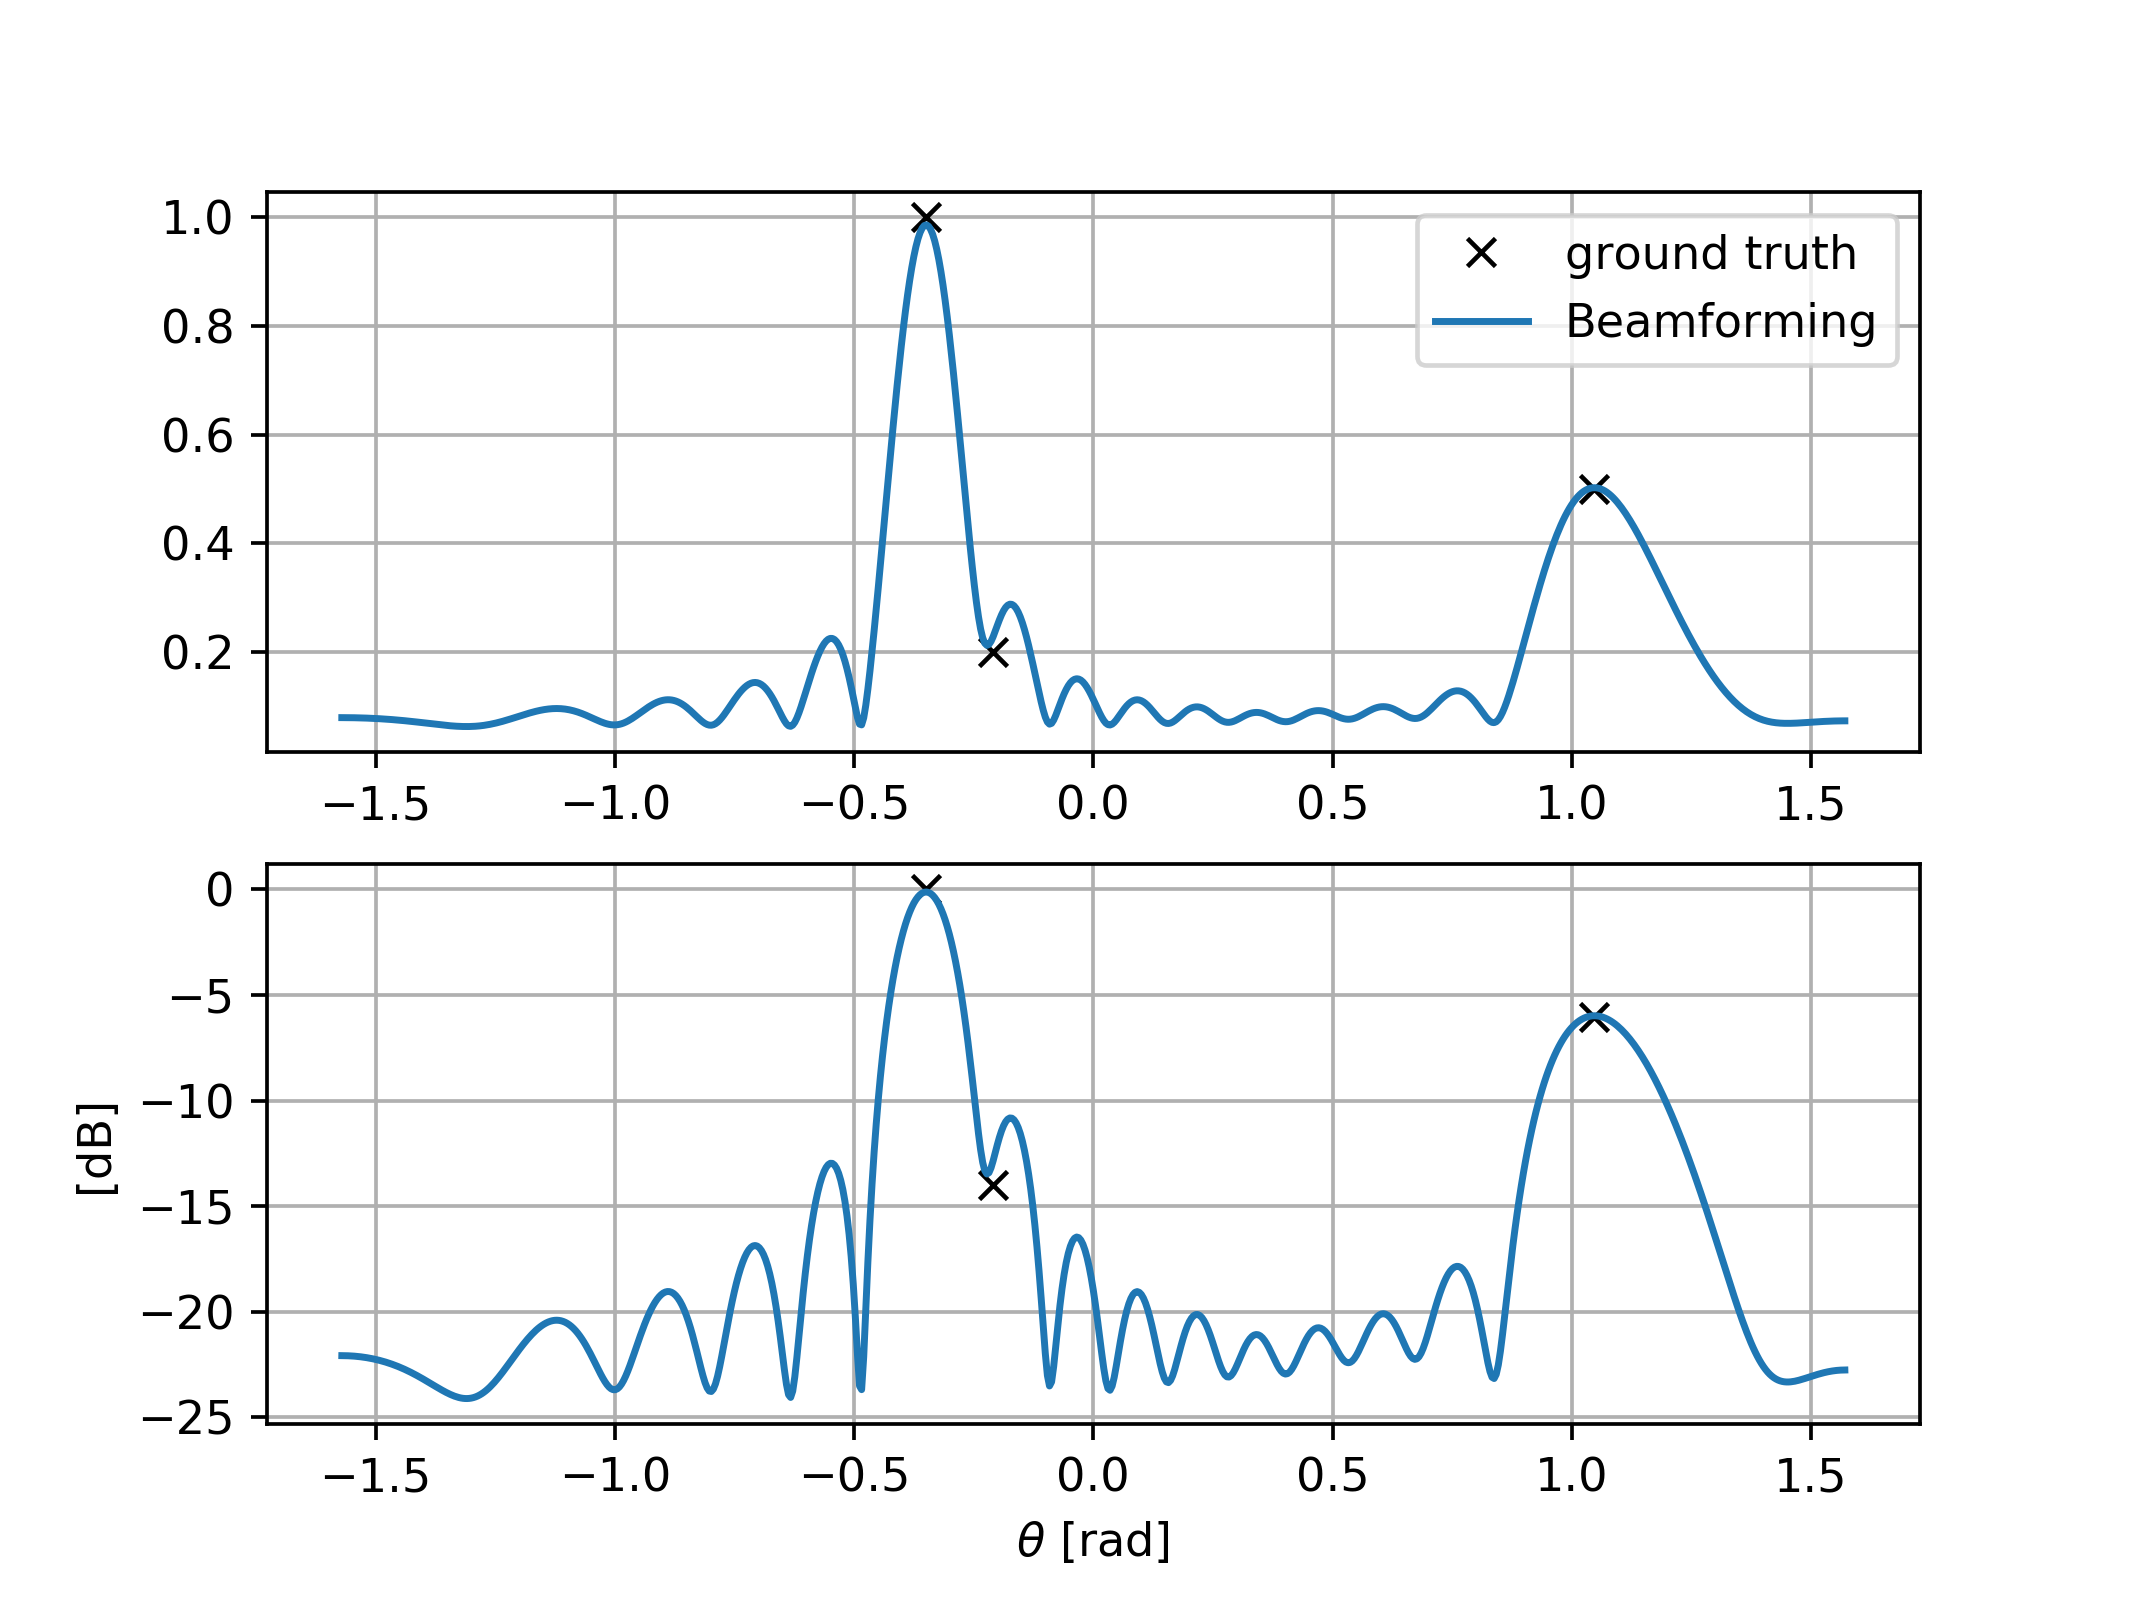

Text(0, 0.5, '[dB]')

In [5]:
# Compute the sample covariance matrix
Syy = y_snap @ y_snap.T.conj() / L

A = np.exp(-2*1j*np.pi*d_norm * pos_sensors * np.sin(thetas))

P_cbf = (A.T.conj() @ Syy  @ A) / np.diag(A.T.conj() @ A)**2

plt.figure(2)
plt.subplot(211)
plt.plot(s_angles, s_amp, "xk", label="ground truth")
plt.plot(thetas, np.diag(P_cbf).real**0.5, label="Beamforming")
plt.grid()
plt.legend()
plt.subplot(212)
plt.plot(s_angles, 20*np.log10(s_amp), "xk")
plt.plot(thetas, 10*np.log10(np.diag(P_cbf).real))
plt.grid()
plt.xlabel(r"$\theta$ [rad]")
plt.ylabel(r"[dB]")

<div class="alert alert-info">
<h3 class="alert-heading"> Question 6 - a parametric method: MVDR</h3>

Implement the MVDR (or Capon) method, to obtain $P_{\text{MVDR}}(\theta)$ on the grid of angles $[\theta_1, \dots, \theta_n, \dots, \theta_N]$. We recall that MVDR estimation writes:

$$ P_{\text{MVDR}}(\theta) =  \dfrac{1}{\mathbf{a}(\theta)^H \mathbf{S}_{yy}^{-1} \mathbf{a}(\theta)} $$
Plot the amplitude $|P_{\text{MVDR}}(\theta)|$ on the linear and dB scales, and compare with the ground truth.
</div>

In [13]:
# Write your code. Please keep the same notations as described.

<div class="alert alert-info">
<h3 class="alert-heading"> Question 7 - a subspace method: MUSIC</h3>

Implement the most classic subspace method: MUSIC. To do so:

1. Obtain the eigenvalue decomposition of the measured covariance $\mathbf{S}_{yy} = \mathbf{U} \mathbf{\Lambda} \mathbf{U}^H$, see `numpy.linalg.eig` (`numpy.linalg.svd` also works in this specific case)


2. Retrieve from $\mathbf{U}$ the eigen vectors spanning the noise subpace $\mathbf{U}_n$

3. Compute the MUSIC spectrum:
$$ P_{\text{MUSIC}}(\theta) =  \dfrac{1}{\mathbf{a}(\theta)^H \mathbf{U}_{n} \mathbf{U}_{n}^H \mathbf{a}(\theta)} $$


What you should do:
* implement the code for MUSIC
* plot the eigenvalues, and comment the result. How do they characterize the signal subspace and the noise subspace?
* plot the amplitude $|P_{\text{MUSIC}}(\theta)|$ on the linear and dB scales, and compare with the ground truth.
</div>

In [21]:
# Write your code. Please keep the same notations as described.

(Your written answer cell, if necessary...)

<div class="alert alert-info">
<h3 class="alert-heading"> Question 8</h3>

Plot the 3 methods together and compare with the ground truth sources, on the linear scale (amplitude) and on the logarithmic scale (dB).
* Which method performs best on the angle accuracy?
* Which method performs best on the amplitude accuracy?
</div>

In [17]:
# Write your code. Please keep the same notations as described.

## Part III - DOA estimation with extensions of MUSIC

<div class="alert alert-info">
<h3 class="alert-heading">  Question 9 - a first extension of MUSIC</h3>

Implement one particular case of Weighted MUSIC, called Min-Norm algorithm. 

Plot the Min-Norm spectrum and compare with the classical MUSIC.
</div>

(Write your answer cell here...)

In [25]:
# Write your code here.

<div class="alert alert-info">
<h3 class="alert-heading">  [OPTIONAL] Question 10 - a second extension of MUSIC</h3>

Implement Root-MUSIC as follows:
1. Calculate the coefficients $\gamma_n$ based on the elements of the noise subspace projector $\mathbf{\Pi}_n = \mathbf{U}_{n} \mathbf{U}_{n}^H$
2. Find the roots of the polynomial via the function `numpy.roots`
3. Plot the roots on the complex space, and select the ones close to the unit circle.
4. Compute the estimated angles

Plot and compare the estimated angles from Root-MUSIC, with $P_{\text{MUSIC}}$ and the ground truth.
</div>

In [20]:
# Write your code. Please keep the same notations as described.